In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# $AR(N)$ genarator

$$ X_{t} = \sum_{i=1}^{N} A_i X_{t-i} + \xi, $$

where $\xi$ is a noise term.

### Model parameters

In [2]:
# parameters:

N = 6 
#raw_coef = np.random.randint(1,10,size=N)
temp = [2,1,2,1,7,9] # coefficients of model 
sample_size = 1500+2*N # number of generated points
AR_coef = np.array(temp)
AR_coef = AR_coef/np.sum(AR_coef) #normalisation
AR_sample = np.zeros(sample_size)

### Data Generation

In [3]:
#genaratin initial N values
initial_val = np.array([0.05,0.04])
AR_sample[:2] = initial_val
#initial loop
for i in range(2,N):
    AR_sample[i] = np.dot(AR_coef[-i:], AR_sample[:i]) # sprawdzic 

In [4]:
#full loop - generating data

for i in range(N,sample_size):
    AR_sample[i] = np.dot(AR_coef, AR_sample[i-N:i]) + 0.0005*(np.random.random()-0.5)

AR_sample= AR_sample[2*N:] #removing first N samples


In [5]:
AR_sample = 1000*(AR_sample - np.mean(AR_sample))

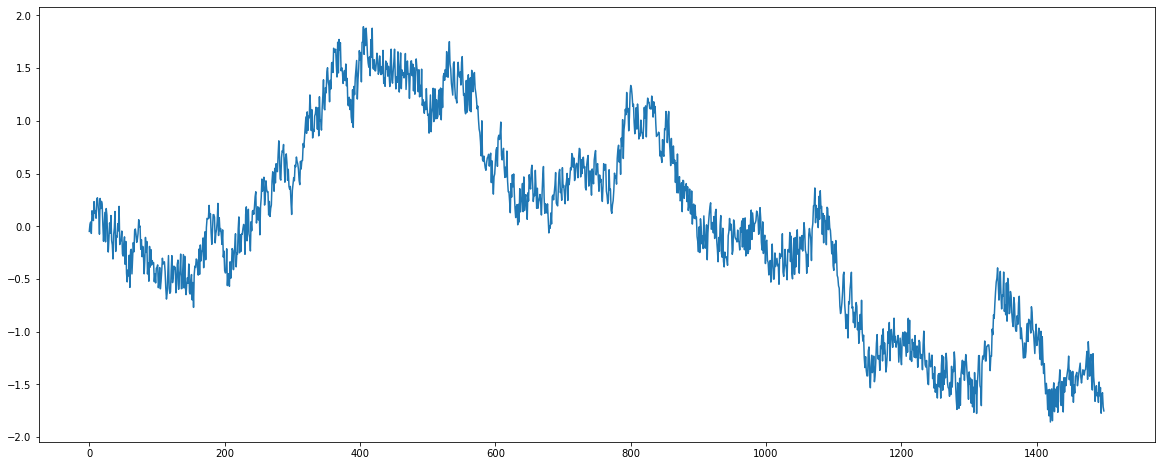

In [7]:
plt.figure(figsize=(20,8))
plt.plot(AR_sample)

## AR estimation

For checking purposes - comparison with ML AR model

In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [9]:
model= ARIMA(AR_sample, order=(N,0,0))
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:                 ARIMA(6, 0, 0)   Log Likelihood                 798.800
Date:                Sun, 24 Jan 2021   AIC                          -1581.600
Time:                        20:51:23   BIC                          -1539.094
Sample:                             0   HQIC                         -1565.765
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3531      0.830     -0.426      0.670      -1.979       1.273
ar.L1          0.4233      0.026     16.520      0.000       0.373       0.474
ar.L2          0.2773      0.028     10.023      0.000       0.223       0.332
ar.L3          0.0660      0.029      2.316      0.021       0.010       0.122
ar.L4          0.0907      0.029      3.150      0.002       0.034       0.147
ar.L5          0.0314      0.028      1.140      0.254      -0.023       0.085
ar.L6          0.1068      0.026      4.162      0.000       0.057       0.157
sigma2         0.0201      0.001     17.943      0.000       0.018       0.022
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                80.06
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.01
Prob(H) (two-sided):                  0.29   Kurtosis:                         1.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Comparison of generator parameters and estimated ones

In [10]:
comp = pd.DataFrame({"model_params" :np.round(AR_coef,4)[::-1], "estimated_params" : results.arparams})

In [11]:
comp

,model_params,estimated_params
0,0.4091,0.423327
1,0.3182,0.277318
2,0.0455,0.066044
3,0.0909,0.090695
4,0.0455,0.031377
5,0.0909,0.106818


### Saving data

In [12]:
#col = ['Item','Sales']
df = pd.DataFrame()

df["Sales"] = AR_sample
df["Item"] = "IT001"
df


,Sales,Item
0,-0.048506,IT001
1,0.019767,IT001
2,0.040116,IT001
3,-0.067794,IT001
4,0.147107,IT001
...,...,...
1495,-1.773212,IT001
1496,-1.610350,IT001
1497,-1.578478,IT001
1498,-1.712295,IT001


In [13]:
df.to_csv("raw_data.csv", index=False)

## Smothing data

The above data are fast varying, which is difficult to model. To simplify this I smooth the model using exponential smoothing method.

In [14]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [15]:
smooth = SimpleExpSmoothing(AR_sample, initialization_method="heuristic").fit(smoothing_level=0.1,optimized=False).fittedvalues

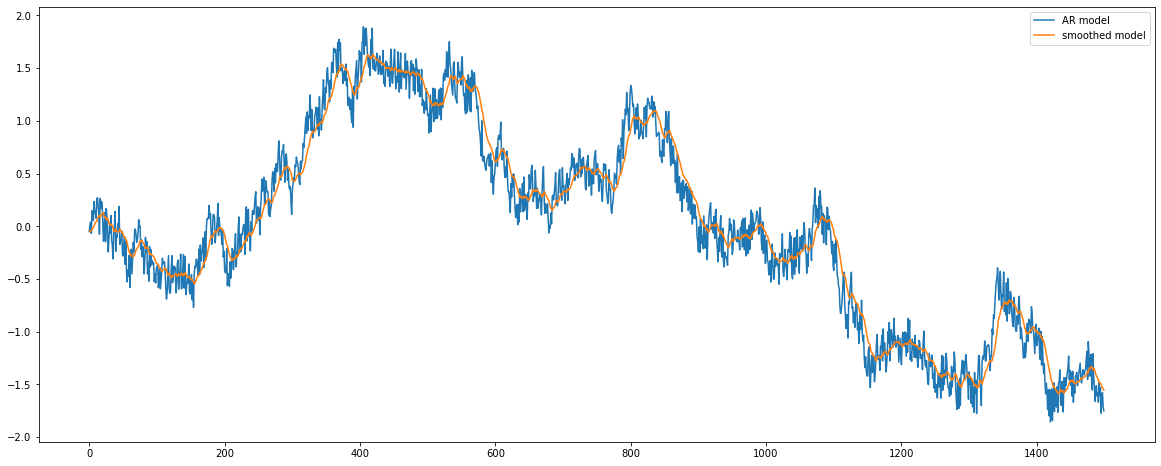

In [16]:
plt.figure(figsize=(20,8))
plt.plot(AR_sample)
plt.plot(smooth)
plt.legend(["AR model", "smoothed model"])

In [17]:
#col = ['Item','Sales']
df2 = pd.DataFrame()

df2["Sales"] = AR_sample
df2["Item"] = "IT001"
df2.to_csv("smooth_raw_data.csv", index=False)